In [1]:
from read_data import read_json, extract_stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data_dir = "../outputs/2025_04_01_09_04_29"

data = read_json(data_dir)

df_list = [extract_stats(name, algo_data) for name, algo_data in data.items()]
df = pd.concat(df_list, ignore_index=True)


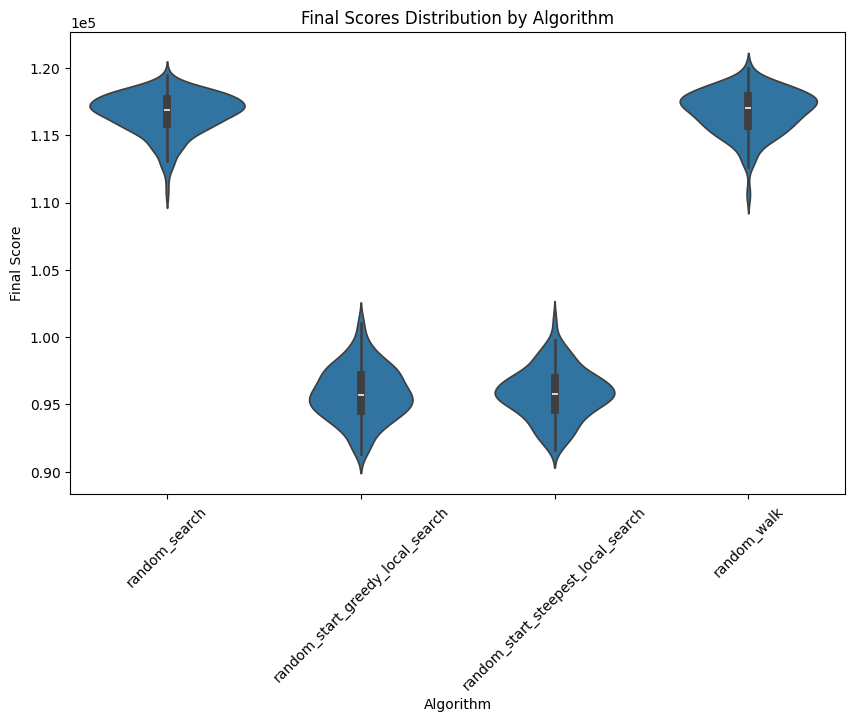

In [29]:
# plot box plot of final scores for each algorithm

plt.figure(figsize=(10, 6))
sns.violinplot(x="Algorithm", y="Final Score", data=df)
plt.title("Final Scores Distribution by Algorithm")
plt.xticks(rotation=45)
# scale on ylabel to scientific notation
plt.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
plt.xlabel("Algorithm")
plt.show()

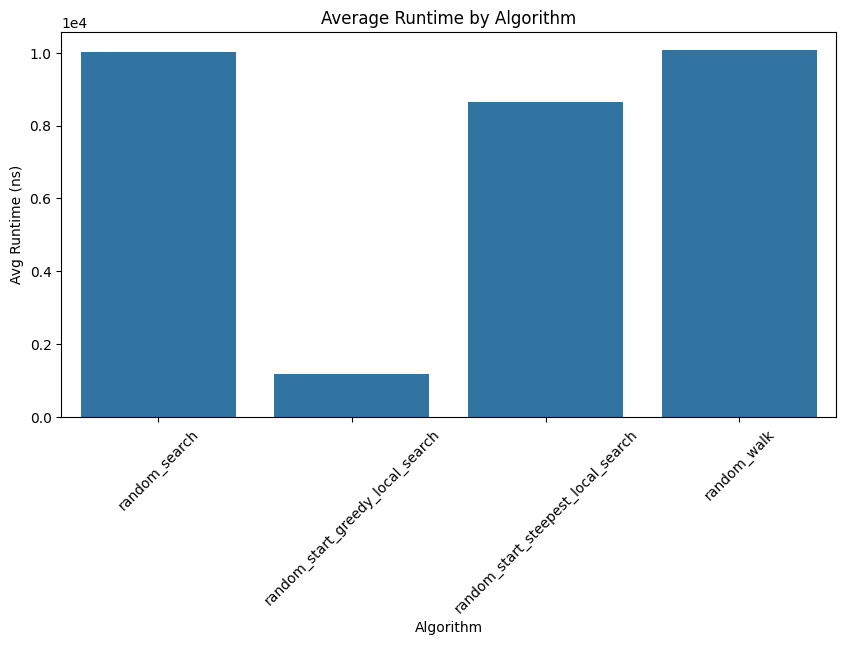

In [25]:
plt.figure(figsize=(10, 5))
sns.barplot(x="Algorithm", y="Avg Runtime", data=df)
plt.title("Average Runtime by Algorithm")
plt.xticks(rotation=45)
plt.ylabel("Avg Runtime (ns)")
plt.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))

plt.show()


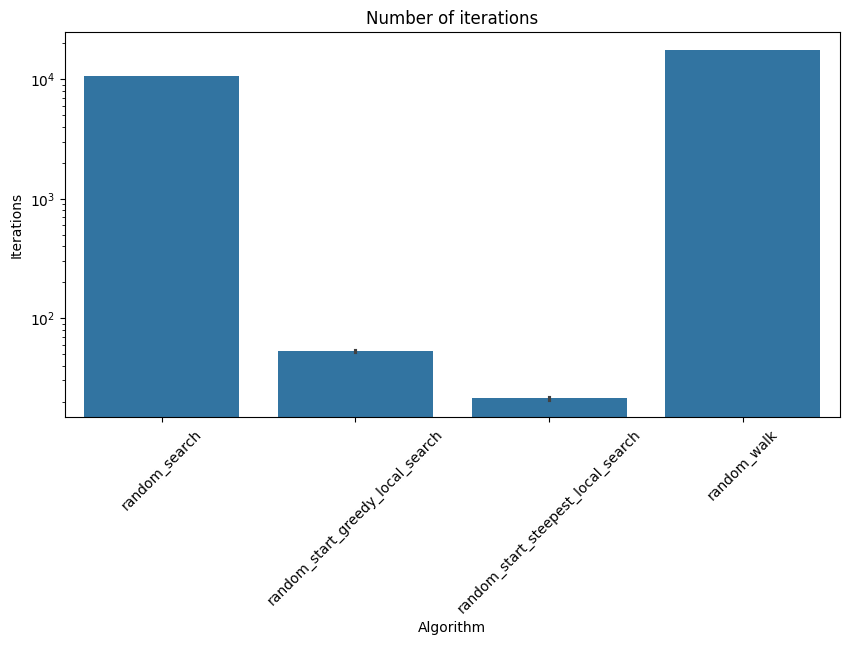

In [23]:
plt.figure(figsize=(10, 5))
sns.barplot(x="Algorithm", y="Iterations", data=df)
plt.title("Number of iterations")
plt.xticks(rotation=45)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
# show maximal value on each bar
plt.annotate(
    df["Iterations"].max(),
    xy=(df["Algorithm"].idxmax(), df["Iterations"].max()),
    xytext=(df["Algorithm"].idxmax(), df["Iterations"].max() + 1),
    ha="center",
    va="bottom",
    fontsize=10,
)

plt.yscale("log")

plt.show()

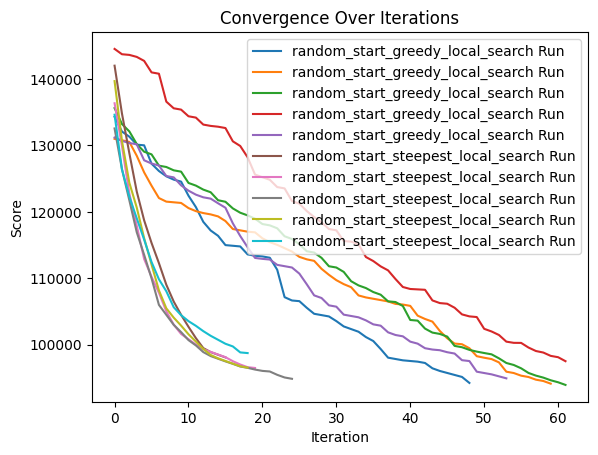

In [28]:
for algo in ["random_start_greedy_local_search", "random_start_steepest_local_search"]:
    algo_runs = data[algo]["runs"]
    for run in algo_runs[:5]:  # Plot 5 random runs
        plt.plot(run["scores"], label=f"{algo} Run")

plt.title("Convergence Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Score")
plt.legend()
plt.show()